# Self Attention LSTM

It is used for ```sequence to sequence``` model. You need equal size of input and output shape.

[READ MORE](https://lena-voita.github.io/nlp_course/seq2seq_and_attention.html#attention_idea)

In [1]:
import random as random
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_sequence(length):
    freq = 5
    noise = [random.uniform(-0.3,0.3) for i in range(length)]
    sequence = [np.sin(2 * np.pi * freq * (i/length)) for i in range(length)]
    signal = np.array(noise) + np.array(sequence)
    return signal

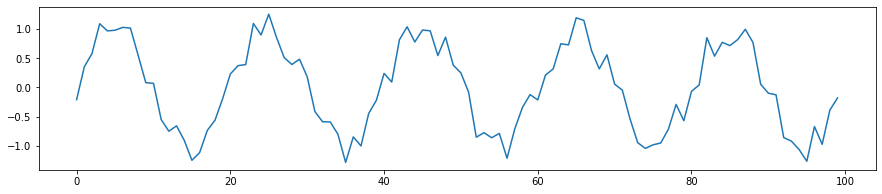

In [3]:
# Plot sequence
sequence = get_sequence(100)
plt.figure(figsize = [15,3])
plt.plot(sequence)
plt.show()

In [4]:
def generate_examples(length, n_samples, output):
    
    X, y = list(), list()
    
    for k in range(n_samples):
        
        sequence1 = get_sequence(length)
        sequence2 = get_sequence(output)
        
        # input output both will have same size
        X.append(sequence1)
        y.append(sequence2)
        
    X = np.array(X).reshape(n_samples, length, 1)
    y = np.array(y).reshape(n_samples, output, 1)
    
    return X, y

In [5]:
X,y = generate_examples(length=100, n_samples=50, output=100)

In [6]:
X.shape, y.shape

((50, 100, 1), (50, 100, 1))

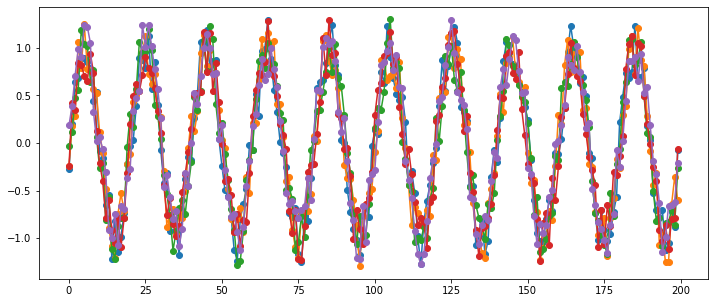

In [8]:
plt.figure(figsize =(12,5))
X, y = generate_examples(100, 5,100)
for i in range(len(X)):
    plt.plot([x for x in X[i, :, 0]] + [x for x in y[i]], '-o') 
plt.show() 

### Model

![img](https://www.mdpi.com/symmetry/symmetry-11-00785/article_deploy/html/images/symmetry-11-00785-g002.png)

In [15]:
#!pip install keras_self_attention 

In [21]:
# Example of one output for whole sequence
from keras.models import Sequential, Model
from keras.layers import Input,LSTM,Dense,RepeatVector,Activation, Flatten
#from keras.optimizers import Adam

In [22]:
# configure problem
sequence_length = 100
cell_unit = 64
output_length = 100

In [40]:
# define model
model = Sequential(name ='self-attention-lstm')

model.add(LSTM(100,return_sequences=True,\
               input_shape=(sequence_length, 1),\
               name='input-layer'))


model.add(SeqSelfAttention(attention_activation='sigmoid'))



model.add(Dense(output_length, name = 'dense-layer'))


# compile
model.compile(loss='mean_squared_error',\
              optimizer='rmsprop',\
              metrics='accuracy')


print(model.summary())

Model: "self-attention-lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (LSTM)          (None, 100, 100)          40800     
                                                                 
 seq_self_attention_3 (SeqSe  (None, 100, 100)         6465      
 lfAttention)                                                    
                                                                 
 dense-layer (Dense)         (None, 100, 100)          10100     
                                                                 
Total params: 57,365
Trainable params: 57,365
Non-trainable params: 0
_________________________________________________________________
None


In [41]:
#First Layer
n = 1 #input vetor x
m = 10 # unit in LSTM
g = 4 # no of neuron layers inside LSTM total 4
parameters = g*(n+m+1)*m
print(parameters)

480


In [42]:
#Middle Layer
n = 10 #input vetor x
m = 10 # unit in LSTM
g = 4 # no of neuron layers inside LSTM total 4
parameters = g*(n+m+1)*m
print(parameters)

840


In [43]:
#Dense Layer
n = 10 #input vetor x
m = 25 # output vector size also equal to number of bias

parameters = n*m + m
print(parameters)

275


Note that output of last LSTM is considerd for dense layer

### Train the Model

In [44]:
sequence_length = 100
output_length = 100

In [45]:
X, y = generate_examples(sequence_length, 1000, output_length)
XX,yy = generate_examples(sequence_length, 200, output_length)

In [46]:
X.shape, y.shape

((1000, 100, 1), (1000, 100, 1))

In [47]:
history=model.fit(X, y,\
                  batch_size=10,\
                  validation_data = (XX,yy),\
                  epochs=5)

Epoch 1/5
100/100 [==============================] - 8s 60ms/step - loss: 0.5301 - accuracy: 0.0000e+00 - val_loss: 0.5276 - val_accuracy: 0.0000e+00
Epoch 2/5
100/100 [==============================] - 5s 54ms/step - loss: 0.2698 - accuracy: 0.0000e+00 - val_loss: 0.0958 - val_accuracy: 0.0000e+00
Epoch 3/5
100/100 [==============================] - 5s 55ms/step - loss: 0.0826 - accuracy: 0.0000e+00 - val_loss: 0.0830 - val_accuracy: 0.0000e+00
Epoch 4/5
100/100 [==============================] - 6s 56ms/step - loss: 0.0652 - accuracy: 0.0000e+00 - val_loss: 0.0788 - val_accuracy: 0.0000e+00
Epoch 5/5
100/100 [==============================] - 5s 53ms/step - loss: 0.0574 - accuracy: 0.0000e+00 - val_loss: 0.0517 - val_accuracy: 0.0000e+00


In [48]:
print(history.history)

{'loss': [0.5301423668861389, 0.26975110173225403, 0.08256366848945618, 0.06515537947416306, 0.05735226348042488], 'accuracy': [0.0, 0.0, 0.0, 0.0, 0.0], 'val_loss': [0.5275735855102539, 0.09577976167201996, 0.08298061043024063, 0.0787874236702919, 0.05173804238438606], 'val_accuracy': [0.0, 0.0, 0.0, 0.0, 0.0]}


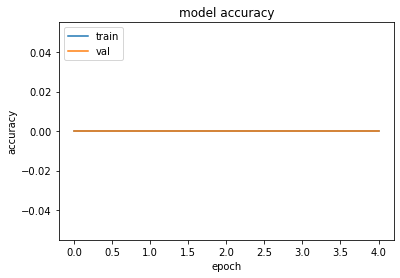

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

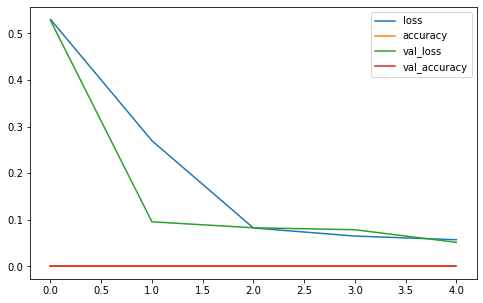

In [50]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

### Test the model

In [51]:
X, y = generate_examples(sequence_length, 100, output_length) 
loss = model.evaluate(X, y, verbose=0)
loss

[0.04986554756760597, 0.0]

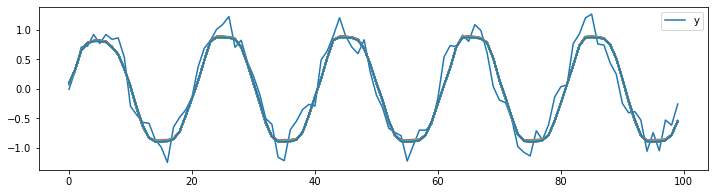

In [52]:
# prediction on new data
X, y = generate_examples(sequence_length, 1, output_length) 
yhat = model.predict(X, verbose=0)

plt.figure(figsize = [12,3])
plt.plot(y[0], label='y') 
plt.plot(yhat[0]) 
plt.legend()
plt.show()


In [53]:
yhat[0].shape, y[0].shape

((100, 100), (100, 1))

- Note: There are 100 plots of y-hat. Each LSTM produce a output that goes to dense layer.

### Weight Matrices

In [54]:
for array in model.layers[0].get_weights():
    print (array.shape)

(1, 400)
(100, 400)
(400,)


In [55]:
for array in model.layers[1].get_weights():
    print (array.shape)

(100, 32)
(100, 32)
(32,)
(32, 1)
(1,)


In [56]:
for array in model.layers[2].get_weights():
    print (array.shape)

(100, 100)
(100,)
